**<H1>CAR PRICE PREDICTION</H1>**




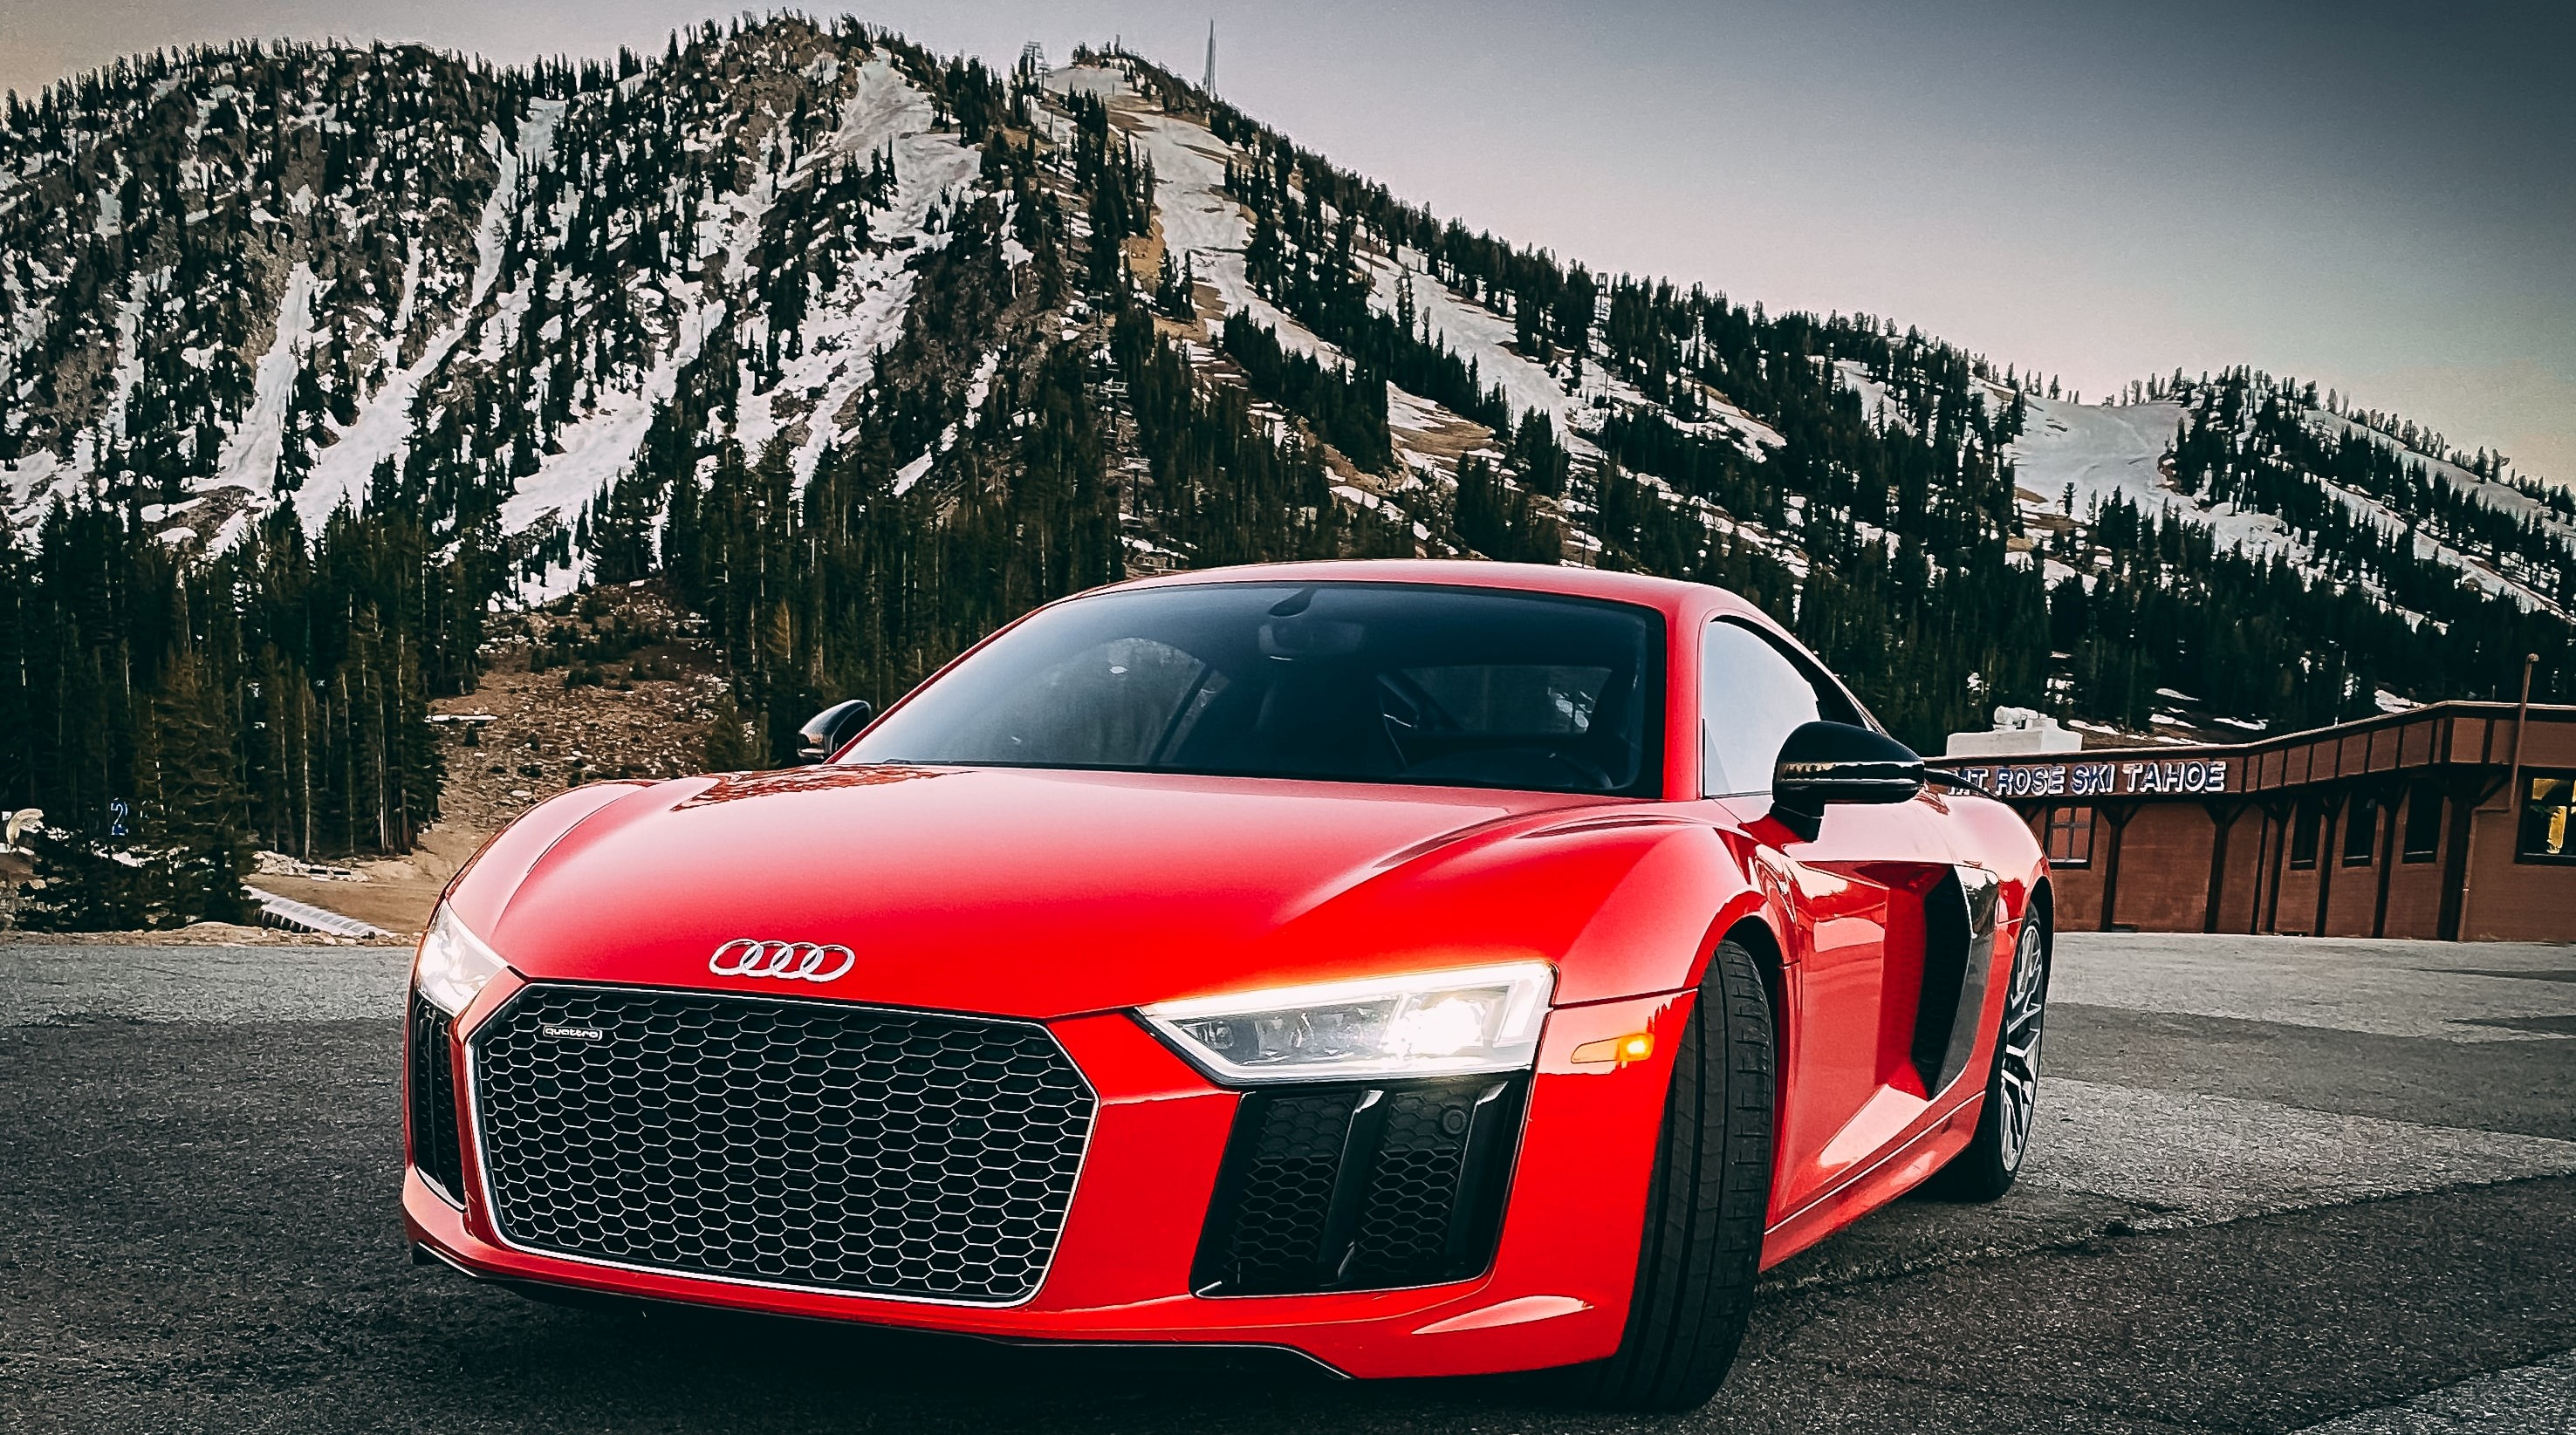

Determining whether the listed price of a used car is a challenging task, due to the many factors that drive a used vehicle’s price on the market. The focus of this project is developing machine learning models that can accurately predict the price of a used car based on its features, in order to make informed purchases.


**<h2>Problem Statement<h2/>**

Based on the factors given in the dataset need to predict the prices of car. It is a Regression problem.

**<h2>Perfomance Metric</h2>**


1)R2_ score 

2) MSE

In this MSE is reduced as much as possible as it is Regression problem  And Ideal MSE is 0

**<h2>Car Price Prediction with Machine Learning</h2>**

One of the main areas of research in machine learning is the prediction of the price of used cars. This dataset consists information about used car listed on cardekho.com. It has 9 columns each columns consists information about specific features like
**Car_Name**: Car names gives information about car company.

**Year**: In which year the brand new car has been purchased.

**selling_price**: Its about the price at which car is being sold and this will be **target label **for further prediction of price.

**km_driven** : It is the number of kilometre car has been driven.

**Fuel_Type**: This feature the fuel type of car (CNG , petrol,diesel etc).

**seller_type**: This tells whether the seller is individual or a dealer. 

**transmission**: This feature gives information about the whether the car is automatic and manual.

**owner**: It is number of previous owner of the car. 

**Present_price** :This will be about  current showroom price of the car.


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

import pickle



In [16]:
from google.colab import files
file = files.upload()


Saving car data.csv to car data (1).csv


In [17]:
data=pd.read_csv("car data.csv")
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
data.shape

(301, 9)

There are 9 columns in this dataset, so it is very important to check whether or not this dataset contains null values before going any further:

In [19]:
data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

So this dataset doesn't have any null values, now let's look at some of the other important insights to get an idea of what kind of data we are dealing with.

In [ ]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


We have 4 features which are have data type as object. We will convert all these except feature called car name  to numerical  so that we can easily use these features while building models 

**<h2>Data Cleaning and Preparation</h2>**

In [20]:
#Fuel_Type===> " 0:Diesel, 1:Petrol, 2: CNG"
#Seller_ type===> "0:Dealer. 1: Individual"
#Transmission ===> "0: Manual, 1: Automatic"

data.Fuel_Type.replace(regex = {"Diesel": "0", "Petrol": "1", "CNG": "2"}, inplace=True)
data.Seller_Type.replace(regex = {"Dealer": "0", "Individual": "1"},inplace=True)
data.Transmission.replace(regex = {"Manual": "0", "Automatic": "1"},inplace=True)
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,0,0,0
1,sx4,2013,4.75,9.54,43000,0,0,0,0
2,ciaz,2017,7.25,9.85,6900,1,0,0,0
3,wagon r,2011,2.85,4.15,5200,1,0,0,0
4,swift,2014,4.60,6.87,42450,0,0,0,0


In [ ]:
data.Car_Name.unique()

array(['ritz', 'sx4', 'ciaz', 'wagon r', 'swift', 'vitara brezza',
       's cross', 'alto 800', 'ertiga', 'dzire', 'alto k10', 'ignis',
       '800', 'baleno', 'omni', 'fortuner', 'innova', 'corolla altis',
       'etios cross', 'etios g', 'etios liva', 'corolla', 'etios gd',
       'camry', 'land cruiser', 'Royal Enfield Thunder 500',
       'UM Renegade Mojave', 'KTM RC200', 'Bajaj Dominar 400',
       'Royal Enfield Classic 350', 'KTM RC390', 'Hyosung GT250R',
       'Royal Enfield Thunder 350', 'KTM 390 Duke ',
       'Mahindra Mojo XT300', 'Bajaj Pulsar RS200',
       'Royal Enfield Bullet 350', 'Royal Enfield Classic 500',
       'Bajaj Avenger 220', 'Bajaj Avenger 150', 'Honda CB Hornet 160R',
       'Yamaha FZ S V 2.0', 'Yamaha FZ 16', 'TVS Apache RTR 160',
       'Bajaj Pulsar 150', 'Honda CBR 150', 'Hero Extreme',
       'Bajaj Avenger 220 dtsi', 'Bajaj Avenger 150 street',
       'Yamaha FZ  v 2.0', 'Bajaj Pulsar  NS 200', 'Bajaj Pulsar 220 F',
       'TVS Apache RTR 180', 

In [ ]:
data.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

There is no Null values in the dataset.

**<h2>Visualization</h2>**

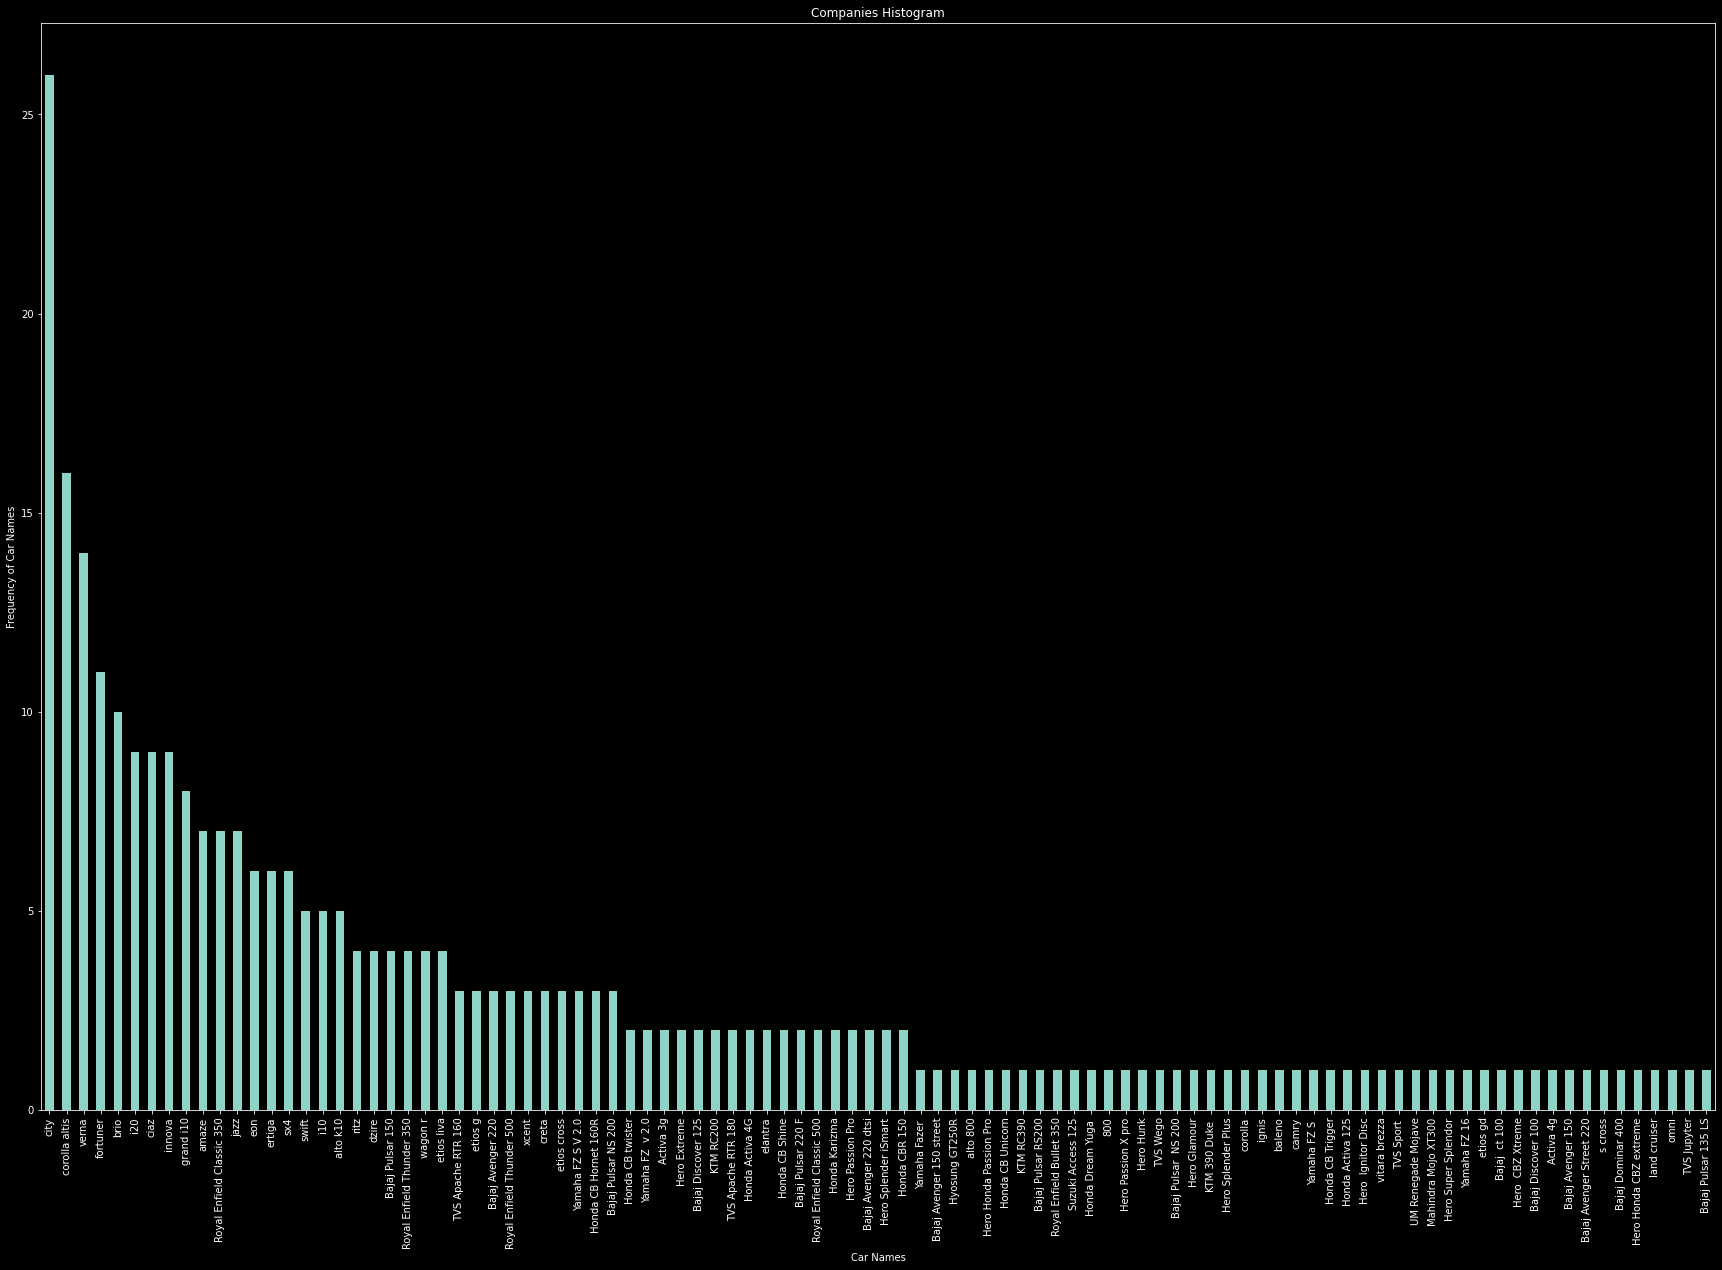

In [ ]:

plt.figure(figsize=(30, 20))

plt1 = data.Car_Name.value_counts().plot.bar()
plt.title('Companies Histogram')
plt.xticks(rotation = 90)
plt1.set(xlabel = 'Car Names', ylabel='Frequency of Car Names')



plt.show()

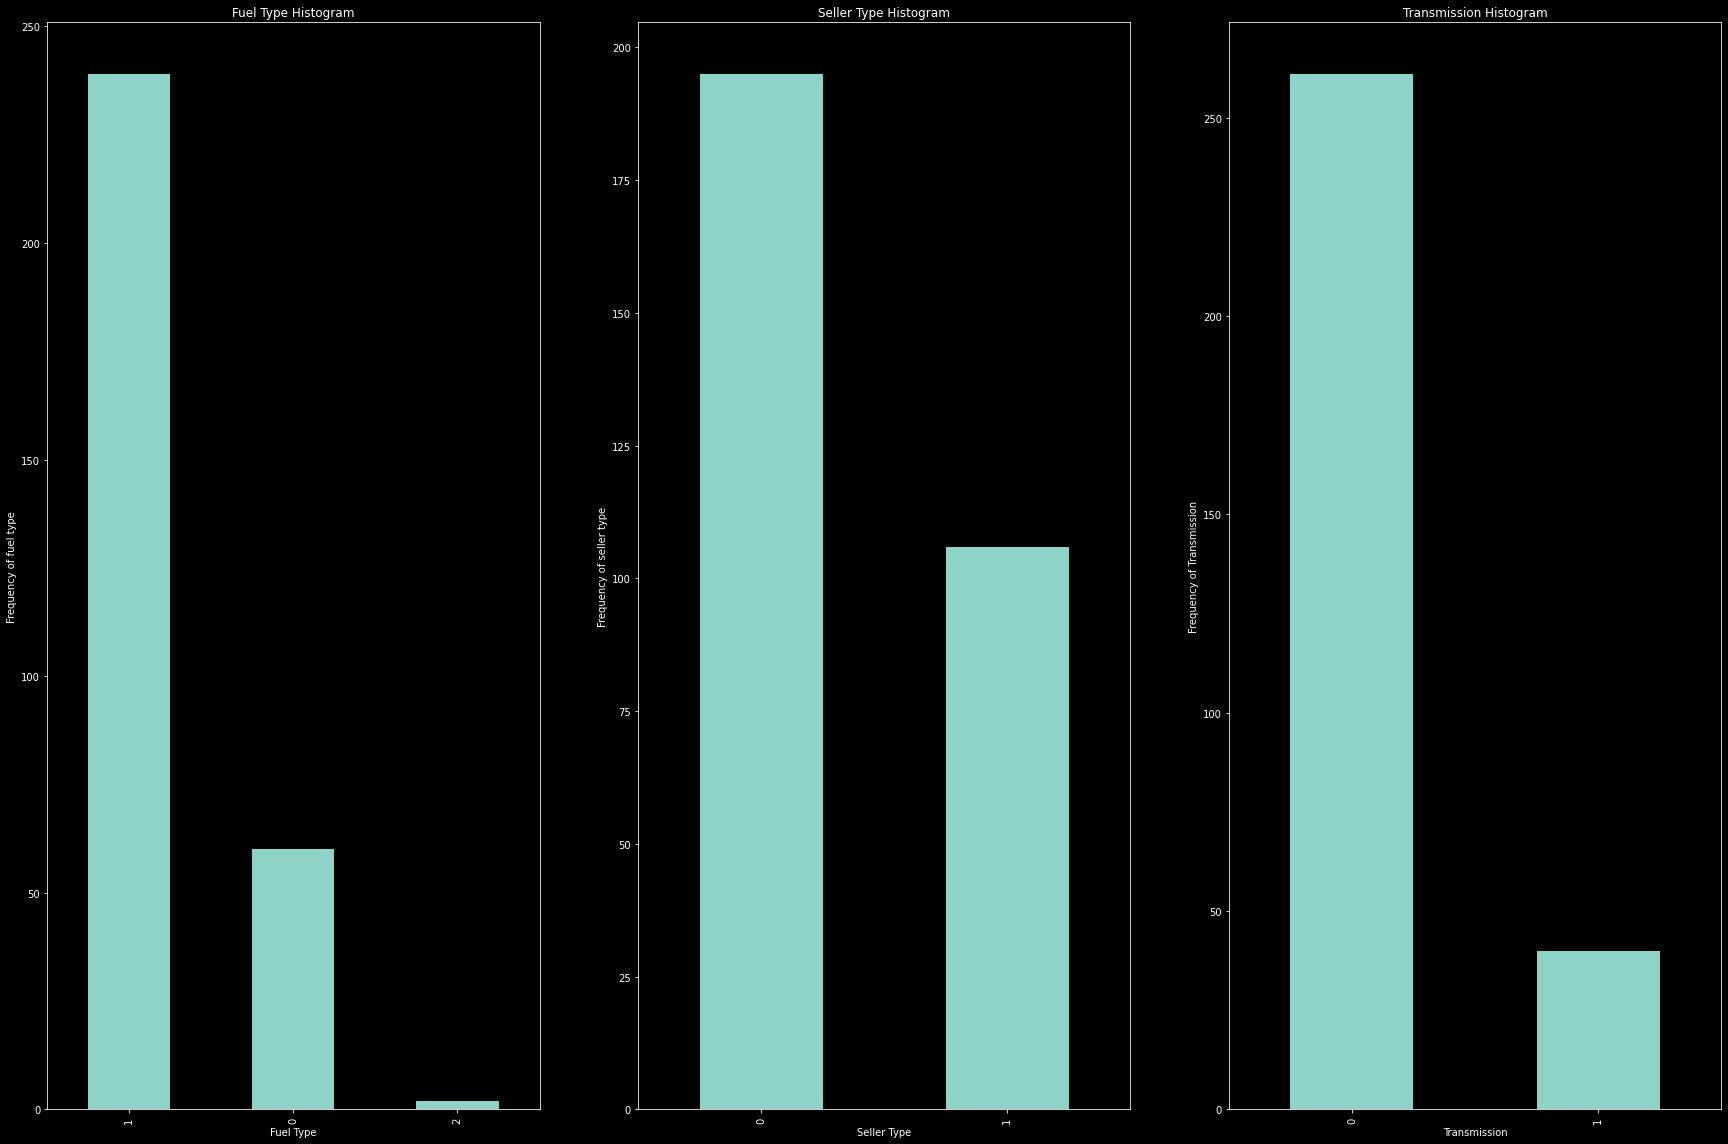

In [ ]:
plt.figure(figsize=(30, 20))
plt.subplot(1,3,1)
plt1 = data.Fuel_Type.value_counts().plot.bar()
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,2)
plt1 = data.Seller_Type.value_counts().plot.bar()
plt.title('Seller Type Histogram')
plt1.set(xlabel = 'Seller Type', ylabel='Frequency of seller type')

plt.subplot(1,3,3)
plt1 = data.Transmission.value_counts().plot.bar()
plt.title('Transmission Histogram')
plt1.set(xlabel = 'Transmission', ylabel='Frequency of Transmission')

plt.show()

**Observation:**

*   city appears to be most favoured car amongst all other car names.
*   Number of petrol fueled type cars are more compared to diesel and CNG.
*   Number of cars selled by Dealers are more than Indiviuals.
*   Manually Transmitted cars are heigher.



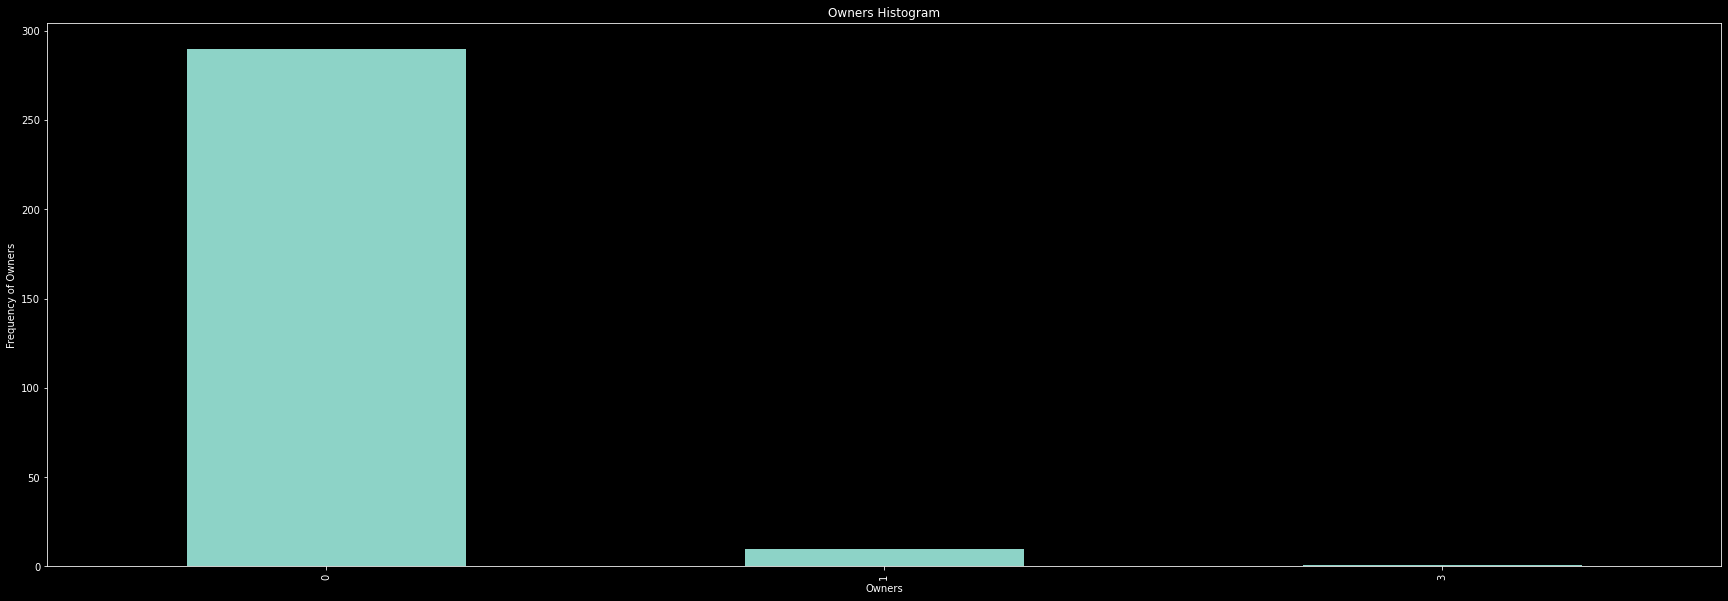

In [ ]:


plt.figure(figsize=(30, 10))

plt1 = data.Owner.value_counts().plot.bar()
plt.title('Owners Histogram')

plt1.set(xlabel = 'Owners', ylabel='Frequency of Owners')
plt.show()





  Most of the cars have owned by 0 owners.




**<h1>Splitting the data</h1>**

In [21]:
y=data.Selling_Price

x = data.drop(["Selling_Price","Car_Name","Kms_Driven"], axis=1)


x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=42)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(240, 6) (240,)
(61, 6) (61,)


In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math
model1= LinearRegression()
model1.fit(x_train,y_train)
y_pred=model1.predict(x_test)

from sklearn.metrics import accuracy_score
mse= mean_squared_error(y_test,y_pred)
print("The R2_score for test data",r2_score(y_test,y_pred))
print("The MSE value for test data",mse)

The R2_score for test data 0.8462284633765287
The MSE value for test data 3.5422172287048816


In [23]:

model2= RandomForestRegressor(n_jobs=-1)
model2.fit(x_train,y_train)
y_pred=model2.predict(x_test)
mse= mean_squared_error(y_test,y_pred)
print("The R2_score for test data",r2_score(y_test,y_pred))
print("The MSE value for test data",mse)

The R2_score for test data 0.9652224029083646
The MSE value for test data 0.8011222772169684


In [24]:

model3= DecisionTreeRegressor()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
print("The R2_score for test data",r2_score(y_test,y_pred))
print("The MSE value for test data",mean_squared_error(y_test,y_pred))


The R2_score for test data 0.9415199699149132
The MSE value for test data 1.3471216757741342


In [25]:
from sklearn.ensemble import ExtraTreesRegressor
model3= ExtraTreesRegressor()
model3.fit(x_train,y_train)
y_pred=model3.predict(x_test)
print("The R2_score for test data",r2_score(y_test,y_pred))
print("The MSE value for test data",mean_squared_error(y_test,y_pred))

The R2_score for test data 0.9660018583662688
The MSE value for test data 0.7831670651366135


In [26]:
model4= KNeighborsRegressor()
model4.fit(x_train,y_train)
y_pred=model4.predict(x_test)

print("The R2_score for test data",r2_score(y_test,y_pred))
print("The MSE value for test data",mean_squared_error(y_test,y_pred))

The R2_score for test data 0.9292872566088175
The MSE value for test data 1.6289093770491805


Observation:

From all the above models the best model is ExtraTree Regressor which have R2 score of 0.966 and MSE value is 0.783

In [27]:
#Dumping the model to pickle file
from sklearn.externals import joblib
joblib.dump(model3, 'model.pkl')

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['model.pkl']

**Feature Importance**

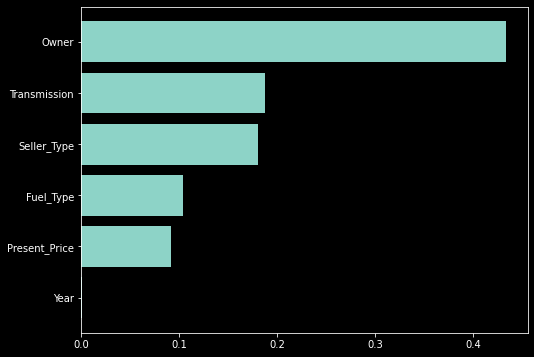

In [29]:
plt.figure(figsize=(8,6))

importance=np.sort(model3.feature_importances_)
plt.barh(x.columns,importance)
plt.show()